## Import the needed libraries

In [3]:
import sys
sys.path.append('..')

import src as odyn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, shape
from pyproj import Proj
import math

## Load probabilities

from Broome county in New York

In [122]:
county = "Broome"
state = "NY"

In [123]:
geo_df = odyn.get_county_mapping_data(county = county, state = state)
hesitancy_dict = odyn.get_hesitancy_dict(geo_df)
prob = list(hesitancy_dict.values())
geo_df

,county,state,area (km^2),population (2019),density,geometry,strongly_hesitant,hesitant_or_unsure,not_hesitant
0,Broome,NY,1853.971476,190488,102.745917,"POLYGON ((-8474771.758 5222645.052, -8474737.5...",0.05,0.0875,0.8625


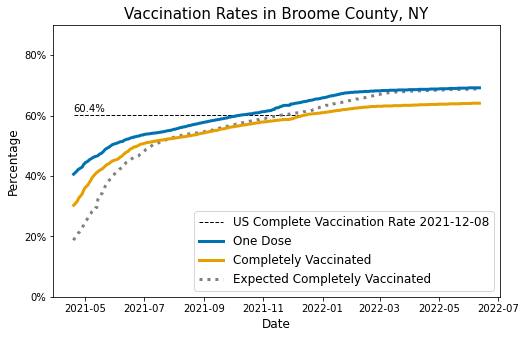

In [125]:
odyn.vaccine_trends_plot(county = county, 
                        state = state, 
                        show_us_current = True,
                        download_data = False)

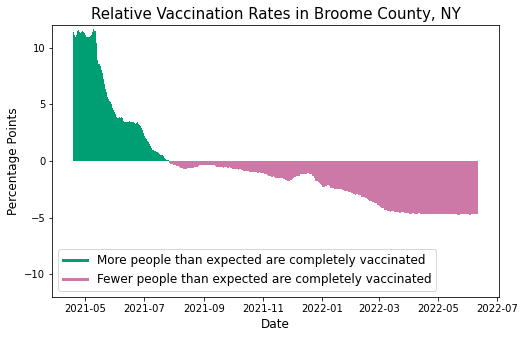

In [126]:
odyn.relative_vaccine_trends_plot(county = county, 
                        state = state, 
                        download_data = False)

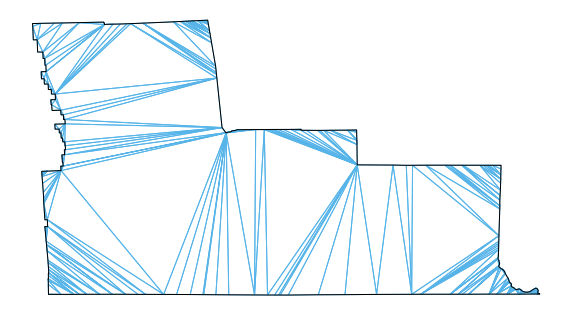

In [127]:
odyn.plot_triangulated_county(geo_df)

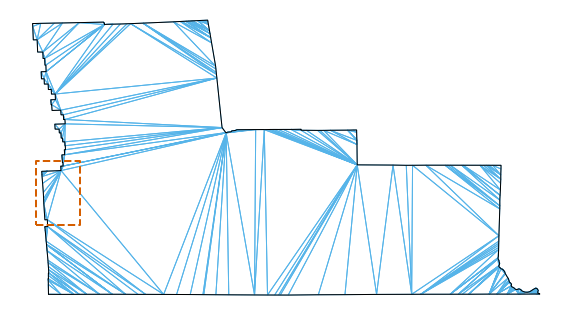

In [128]:
bounding_box = [[-76.125, 42.105], 
                [-76.058, 42.105], 
                [-76.058, 42.202], 
                [-76.125, 42.202], 
                [-76.125, 42.105]]

odyn.plot_triangulated_county(geo_df, 
                              bounding_box = bounding_box, 
                              restricted = False,
                              aspect_ratio =1)

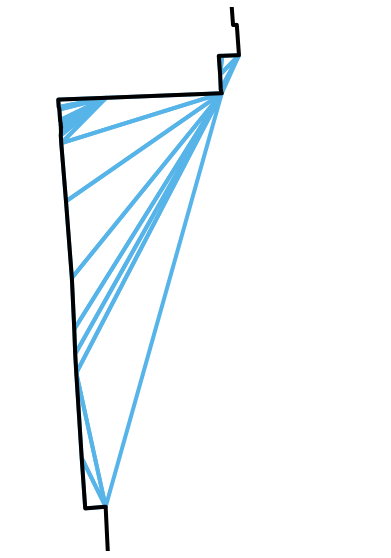

In [ ]:
odyn.plot_triangulated_county(geo_df, 
                              bounding_box = bounding_box, 
                              restricted = True,
                              aspect_ratio =1)

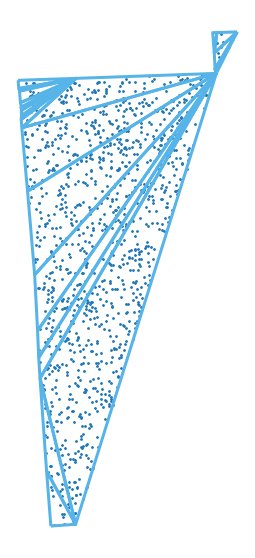

In [137]:
model = odyn.OpinionNetworkModel(probabilities = prob)
agent_df = model.add_random_agents_to_triangles( 
                                        geo_df, 
                                        bounding_box = bounding_box,
                                        show_plot = True)


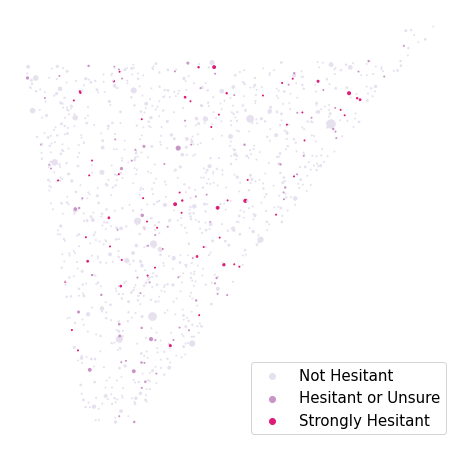

In [49]:
belief_df = model.assign_weights_and_beliefs(agent_df, show_plot = True)

In [55]:
# THIS WILL TAKE A FEW MOMENTS.
model = odyn.OpinionNetworkModel(probabilities = prob,
                                include_weight = True,
                                include_opinion = True,
                                importance_of_weight = 0.05,
                                importance_of_distance = 9)
model.populate_model(geo_df = geo_df, 
                     bounding_box = bounding_box)

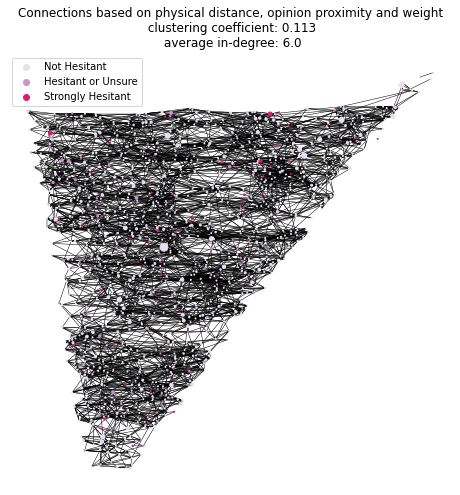

In [56]:
model.plot_initial_network()

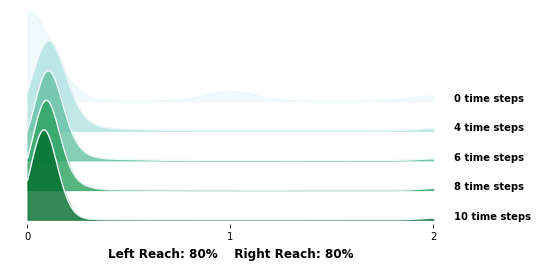

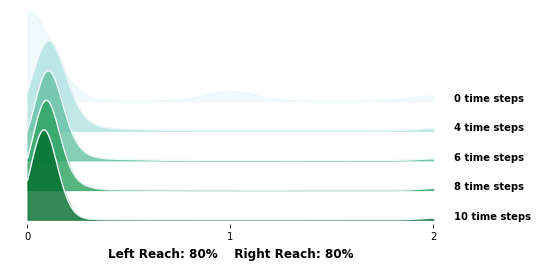

In [57]:
sim = odyn.NetworkSimulation()
sim.run_simulation(model = model)
sim.plot_simulation_results()

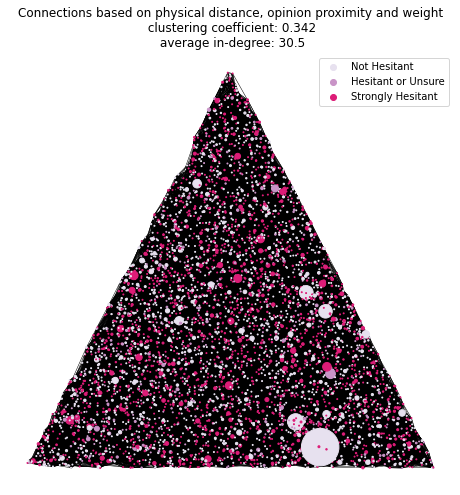

In [149]:
model = odyn.OpinionNetworkModel()
model.populate_model(num_agents = 5000, geo_df = geo_df)
model.plot_initial_network()

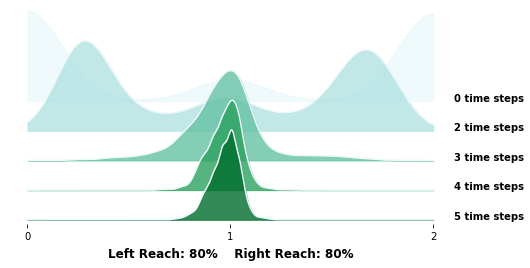

In [150]:
sim = odyn.NetworkSimulation()
sim.run_simulation(model = model)
sim.plot_simulation_results()

In [58]:
# THIS WILL TAKE A FEW MOMENTS.
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45])
model.populate_model(num_agents = 1000)

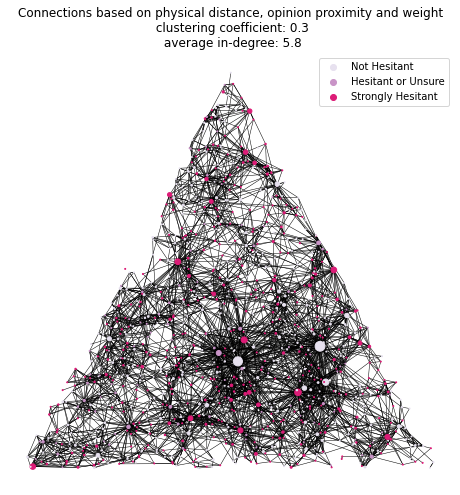

In [59]:
model.plot_initial_network()

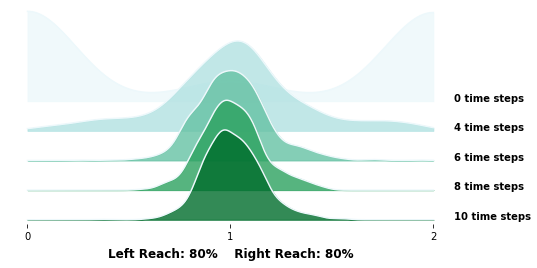

In [61]:
sim = odyn.NetworkSimulation()
sim.run_simulation(model = model,
                   store_results = True
                  )
sim.plot_simulation_results()

In [86]:
print(sim.results[0]['belief_df']['belief'].mean(axis = 0))
print(sim.results[1]['belief_df']['belief'].mean(axis = 0))

means = []
for result in sim.results:
    means.append(result['belief_df']['belief'].mean(axis = 0))

print(means)

1.0026622449231195
1.0135618989660542
[1.0026622449231195, 1.0135618989660542, 1.014198172653746, 1.0179380066893509, 1.009980814342332, 1.0125112469032627, 1.0119421012606613, 1.011168947251413, 1.0113729092392123, 1.013282799679369, 1.0115200365364692, 1.0114279270383613]


In [2]:
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45],
                                 power_law_exponent = 3,
                                 openness_to_neighbors = 1.5,
                                 left_reach = 0.7,
                                 right_reach = 0.6)

In [3]:
model.populate_model(num_agents = 500)

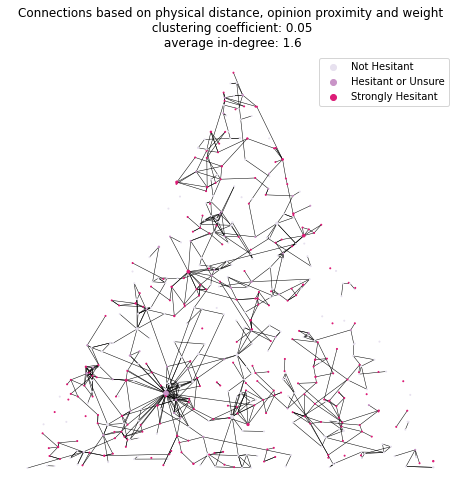

In [4]:
model.plot_initial_network()

In [5]:
sim = odyn.NetworkSimulation()

In [ ]:
sim.run_simulation(model = model,
                   store_results = True
                  )

In [ ]:
sim.plot_simulation_results()

In [ ]:
means = []
for result in sim.results:
    means.append(result['belief_df']['belief'].mean(axis = 0))

print(means)

In [2]:
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45])
model.populate_model(num_agents = 1000)
sim = odyn.NetworkSimulation()

In [18]:
belief_df = model.belief_df
n = model.belief_df.index.shape[0]

In [11]:
prob_array = np.ones((n,n))
dist_array = np.zeros((n,n))

In [34]:
#this should be in a for loop
point_i = Point(belief_df.loc[0,'x'], belief_df.loc[0,'y'])
print(point_i)
x_y_df = belief_df[['x','y']]

POINT (521.1552397981657 104.83828712445778)


In [55]:
dist_array[0,:] = [point_i.distance(Point(belief_df.loc[j,"x"],
                                                       belief_df.loc[j,"y"])
                                                    ) for j in belief_df.index]

In [99]:
for i in range(n):
            point_i = Point(belief_df.loc[i,"x"],belief_df.loc[i,"y"])

            # Get distances from i to each other point.
            dist_array[i,:] = [point_i.distance(Point(belief_df.loc[j,"x"],
                                                       belief_df.loc[j,"y"])
                                                    ) for j in belief_df.index]

CPU times: total: 1min 11s
Wall time: 1min 11s


In [96]:
dist_array[0][14]

951.4303927595729

In [101]:
x_y_array = x_y_df.to_numpy()
dist_array_2 = np.zeros((n,n))
math.dist(x_y_array[0], x_y_array[1])
for i in range(n):
    dist_array_2[i,:] = [(math.dist(x_y_array[i], x_y_array[j])) for j in range(len(x_y_array))]

In [95]:
dist_array_2[0][14]

951.430392759573

In [94]:
truth_array = dist_array == dist_array_2
truth_array[0][14]

False

In [9]:
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45], importance_of_distance = 0.1, track_network_stats = False)
model.populate_model(num_agents = 1000)

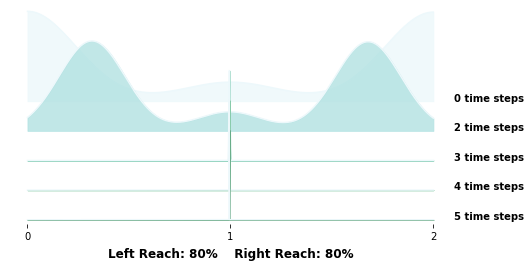

In [13]:
sim = odyn.NetworkSimulation()
sim.run_simulation(model = model,
           store_results = True,
           stopping_thresh = 0.0001)
sim.plot_simulation_results()

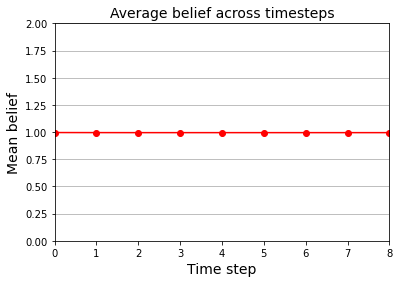

In [14]:
odyn.plot_mean_beliefs(sim.results)

In [16]:
sim.results

[{'belief_df':                x            y     weight    belief decile
  0     755.896831   596.444020  17.945526  1.825688     99
  1     858.621138   733.589722   1.519337  0.173358     47
  2     562.016705   576.076652   1.127644  0.175503     17
  3     751.105516   838.436941   3.001192  0.173358     81
  4    1120.776337   163.269632   1.896197  1.826168     62
  ..           ...          ...        ...       ...    ...
  995   948.839868   904.465820   1.671925  1.825046     54
  996   819.805122  1163.554439   4.701631  1.822222     91
  997   652.233426  1155.065462   3.660873  0.995960     86
  998   883.317162   531.083148   1.392290  0.995968     39
  999   561.537960   605.801387   1.049690  0.996973      8
  
  [1000 rows x 5 columns],
  'adjacency_df':      0    1    2    3    4    5    6    7    8    9    ...  990  991  992  \
  0      0    0    0    0    1    0    0    1    1    1  ...    0    1    0   
  1      0    0    1    1    0    1    1    0    0    0  ...   

In [ ]:
%%time
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45])
model.populate_model(num_agents = 1000)
sim = odyn.NetworkSimulation()
sim.run_simulation(model = model,
           store_results = True
          )
sim.plot_simulation_results()

NameError: name 'odyn' is not defined

In [3]:
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45], importance_of_distance = 8.5)
agent_df = model.add_random_agents_to_triangle(num_agents = 1000, 
                                                        geo_df = None,
                                                        show_plot = False)

In [4]:
belief_df = model.assign_weights_and_beliefs(agent_df)

In [5]:
prob_df = model.compute_probability_array(belief_df)
adjacency_df = model.compute_adjacency(prob_df)

In [6]:
mega_influencer_df = model.connect_mega_influencers(belief_df)

In [30]:
# cc, md = model.compute_network_stats(adjacency_df)
# Enterinng the above function
cc = 0
degrees = []

In [31]:
import itertools

In [32]:
i = 0
nbhd = np.where(adjacency_df.loc[:,i] != 0)[0]
deg = len(nbhd)
degrees.append(deg)
cc_i = 0
if deg > 2:
    C = list(itertools.permutations(nbhd,2))
    cc_i = np.sum([int(adjacency_df.loc[c[0],c[1]] > 0) for c in C]
                                        ) / math.perm(deg,2)


cc += cc_i

In [2]:
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45], distance_scaling_factor = 1/20, track_network_stats = False)
model.populate_model(num_agents = 1000, show_plot = False)
sim = odyn.NetworkSimulation()

In [3]:
results = []
new_belief_df = model.belief_df.copy()
new_adjacency_df = model.adjacency_df.copy()
new_mega_influencer_df = model.mega_influencer_df.copy()

In [4]:
df = pd.DataFrame()
df[0] = new_belief_df["belief"].values

In [5]:
stopping_thresh = .01

In [6]:
stopping_df = pd.DataFrame()

In [7]:
i = 0

In [67]:
phase_dict = {}

In [68]:
new_belief_df, new_mega_influencer_df = sim.one_dynamics_iteration(
                            belief_df = new_belief_df,
                            adjacency_df = new_adjacency_df,
                            openness_to_influencers = model.openness_to_influencers,
                            mega_influencer_df = new_mega_influencer_df, 
                            threshold = model.threshold)

In [69]:
phase_dict["belief_df"] = new_belief_df

In [70]:
prob_df = model.compute_probability_array(new_belief_df)

In [71]:
new_adjacency_df = model.compute_adjacency(prob_df)

In [72]:
new_adjacency_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
new_adjacency_df.columns = [int(i) for i in new_adjacency_df.columns]

In [74]:
phase_dict["adjacency_df"] = new_adjacency_df

In [75]:
if model.track_network_stats == True:
    clust_coeff, mean_degree = model.compute_network_stats(new_adjacency_df)
else: # If network stats are not being recorded we will reprt NaN to indicate that
    clust_coeff, mean_degree = float("nan"), float("nan")

In [76]:
phase_dict["clust_coeff"] = clust_coeff
phase_dict["mean_degree"] = mean_degree

In [77]:
results.append(phase_dict)

In [78]:
df_copy = df.copy()

In [79]:
%%time
df_copy[i + 1] = new_belief_df["belief"].values
df_copy

CPU times: total: 0 ns
Wall time: 0 ns


,0,1,2
0,0,0.000,0.528571
1,0,0.000,0.000000
2,2,2.000,2.000000
3,1,1.375,1.081667
4,2,2.000,2.000000
...,...,...,...
995,2,2.000,2.000000
996,2,2.000,2.000000
997,0,0.000,0.166667
998,2,1.750,1.481293


In [80]:
%%time
new_df = pd.concat([df, new_belief_df["belief"]], axis=1, ignore_index = True)
new_df

CPU times: total: 31.2 ms
Wall time: 981 µs


,0,1,2
0,0,0.000,0.528571
1,0,0.000,0.000000
2,2,2.000,2.000000
3,1,1.375,1.081667
4,2,2.000,2.000000
...,...,...,...
995,2,2.000,2.000000
996,2,2.000,2.000000
997,0,0.000,0.166667
998,2,1.750,1.481293


In [81]:
bool_df = df_copy == new_df

In [82]:
is_same = True
for x in bool_df:
    for y in bool_df[x]:
        if y == False:
            is_same = False
        
is_same

True

In [83]:
new_df.iloc[:,i+1]

0      0.528571
1      0.000000
2      2.000000
3      1.081667
4      2.000000
         ...   
995    2.000000
996    2.000000
997    0.166667
998    1.481293
999    0.000000
Name: 2, Length: 1000, dtype: float64

In [84]:
new_df.iloc[:,i]

0      0.000
1      0.000
2      2.000
3      1.375
4      2.000
       ...  
995    2.000
996    2.000
997    0.000
998    1.750
999    0.000
Name: 1, Length: 1000, dtype: float64

In [85]:
copy_stopping_df = pd.DataFrame()

In [86]:
copy_stopping_df[i] = new_df.iloc[:,i+1] - new_df.iloc[:,i]
copy_stopping_df

,1
0,0.528571
1,0.000000
2,0.000000
3,-0.293333
4,0.000000
...,...
995,0.000000
996,0.000000
997,0.166667
998,-0.268707


In [87]:
stopping_df = pd.concat([stopping_df, new_df.iloc[:,i+1] - new_df.iloc[:,i]], axis=1, ignore_index=True)

In [89]:
stopping_df

,0,1
0,0.000,0.528571
1,0.000,0.000000
2,0.000,0.000000
3,0.375,-0.293333
4,0.000,0.000000
...,...,...
995,0.000,0.000000
996,0.000,0.000000
997,0.000,0.166667
998,-0.250,-0.268707


In [94]:
stopping_df[1] == copy_stopping_df[1]

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: 1, Length: 1000, dtype: bool

In [96]:
bool_df = stopping_df[1] == copy_stopping_df[1]
is_same = True
for x in bool_df:
        if x == False:
            is_same = False
        
is_same

True

In [66]:
df = new_df.copy()

In [58]:
i = i + 1

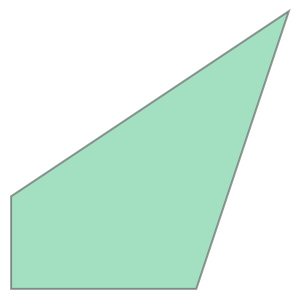

In [151]:
triangle_object = Polygon([[0,0],[200,0], [300,300],[0,100]])
triangle_object

In [152]:
bnd = list(triangle_object.boundary.coords)
gdf = gpd.GeoDataFrame(geometry = [triangle_object])

In [153]:
gdf.crs = "EPSG:3857"

In [154]:
gdf = gdf.to_crs(epsg=4326) 

In [155]:
co = list(gdf.loc[0,"geometry"].exterior.coords)

In [156]:
lon, lat = zip(*co)

In [157]:
pa = Proj(
    "+proj=aea +lat_1=37.0 +lat_2=41.0 +lat_0=39.0 +lon_0=-106.55")
x, y = pa(lon, lat)
coord_proj = {"type": "Polygon", "coordinates": [zip(x, y)]}
area = shape(coord_proj).area / (10 ** 6) # area in km^2

In [158]:
V1 = np.array(bnd[0])
V2 = np.array(bnd[1])
V3 = np.array(bnd[2])
V4 = np.array(bnd[3])

In [159]:
# Sample from uniform distribution on [0,1]
U = np.random.uniform(0,1, 1000)
V = np.random.uniform(0,1, 1000)

UU = np.where(U + V > 1, 1-U, U)
VV = np.where(U + V > 1, 1-V, V) 

In [160]:
# Shift triangle into origin and and place points.
agents_1 = ((UU.reshape(len(UU),-1) * (V4 - V1).reshape(-1,2)) +
         (VV.reshape(len(VV),-1) * (V3 - V1).reshape(-1,2)))
agents_2 = ((UU.reshape(len(UU),-1) * (V2 - V1).reshape(-1,2)) +
         (VV.reshape(len(VV),-1) * (V3 - V1).reshape(-1,2)))

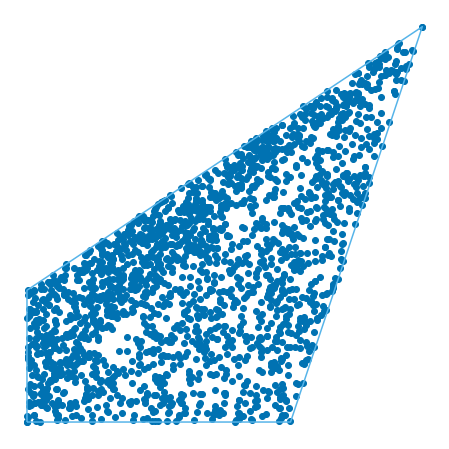

In [161]:
 # Shift points back to original position.
agents_1 = agents_1 + V1.reshape(-1,2)
agents_2 = agents_2 + V1.reshape(-1,2)
agent_1_df = pd.DataFrame(agents_1, columns = ["x","y"])
agent_2_df = pd.DataFrame(agents_2, columns = ["x","y"])
agent_df = pd.concat([agent_1_df, agent_2_df], axis=0, ignore_index = True)
odyn.plot_agents_on_triangle(triangle_object, agent_df)